In [7]:
# Importing Relevant Packages
import os
import pandas as pd
import numpy as np
import warnings
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


!pip install xgboost

In [19]:
# Importing Merged data
import_path = r"C:\Users\admin\Desktop\Masters AI\Project A\Week 3"
export_path = r"C:\Users\admin\Desktop\Masters AI\Project A\Week 3"
plots_path = r'C:\Users\admin\Desktop\Masters AI\Project A\Week 3\plots'


file, date_fields = 'wf1.csv', ['date','acq_date']
vars()[file[0:-4]] = pd.read_csv('/'.join([import_path,file[:]]),parse_dates=date_fields)
print(file,' = ',vars()[file[0:-4]].shape)

In [9]:
# set states values for drop function
states = ['state_Australian Capital Territory', 'state_New South Wales','state_Northern Territory', 'state_Queensland','state_South Australia', 'state_Tasmania', 'state_Victoria','state_Western Australia']


drop_features1 = ['date','minC_14ave', 'minC_30ave','Snow_cm','sunHour', 'uv_14ave', 'uv_30ave','DewPointC','FeelsLikeC', 'HeatIndexC', 'WindChillC','WindGustKmph',
                   'humidity_14ave','humidity_30ave','precipMM_7ave','precipMM_14ave','precipMM_90ave','pressure', 'tempC', 'visibility','location','acq_date',
                   'suburb','region','frp_min','frp_max','frp_sum','frp_median','frp_mean']

drop_features2 = ['date','minC_14ave', 'minC_30ave', 'uv_14ave', 'uv_30ave','WindGustKmph','humidity_14ave','humidity_30ave','precipMM_7ave','precipMM_14ave',
                  'precipMM_90ave','pressure', 'acq_date','region','frp_min','frp_max','frp_sum','frp_median','frp_mean']

In [10]:
wf1b = wf1.copy()

wf1b['cat'] = 0

# BINARY - frp_MAX 
wf1b['cat'] = np.where(wf1b['frp_max'] < 12, 'low', wf1b['cat'])
wf1b['cat'] = np.where(wf1b['frp_max'] >= 12, 'high', wf1b['cat'])

print(wf1b.cat.value_counts(),'\n')

wf1b_ed = wf1b.drop(drop_features1, axis = 1) 

# -----------------------------------------------------------------
# Victoria only data
wf1b_ed_vic = wf1b_ed[wf1b_ed.state_Victoria == 1]
wf1b_ed_vic = wf1b_ed_vic.drop(states ,axis=1).reset_index(drop=True)
# -----------------------------------------------------------------

# DROP STATES
# wf1b_ed = wf1b_ed.drop(states ,axis=1).reset_index(drop=True)

pd.set_option('display.max_columns', 20)
wf1b_ed

low     1909066
high      65572
Name: cat, dtype: int64 



,maxC,maxC_90ave,minC,minC_90ave,uv,uv_90ave,cloudcover,humidity,humidity_90ave,precipMM,...,state_Tasmania,state_Victoria,state_Western Australia,season_summer,season_autumn,season_winter,season_spring,zone_north,zone_south,cat
0,19,18.5,14,11.5,4,4.1,55,85,78.2,1.3,...,0,0,1,0,0,0,1,0,1,low
1,21,18.6,12,11.6,5,4.1,29,76,78.3,0.0,...,0,0,1,0,0,0,1,0,1,low
2,20,18.6,14,11.6,4,4.2,71,80,78.3,1.4,...,0,0,1,1,0,0,0,0,1,low
3,17,18.6,12,11.7,4,4.2,47,70,78.3,0.2,...,0,0,1,1,0,0,0,0,1,low
4,24,18.7,12,11.7,5,4.2,31,72,78.3,0.0,...,0,0,1,1,0,0,0,0,1,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974633,28,17.2,15,8.9,6,3.7,6,64,80.7,0.0,...,0,0,0,0,0,0,1,0,1,low
1974634,29,17.4,15,9.1,7,3.8,4,66,80.5,0.0,...,0,0,0,0,0,0,1,0,1,low
1974635,28,17.5,20,9.2,7,3.8,25,61,80.3,0.8,...,0,0,0,0,0,0,1,0,1,low
1974636,25,17.7,20,9.4,5,3.8,61,69,80.1,8.4,...,0,0,0,0,0,0,1,0,1,low


In [13]:
import xgboost as xgb

!pip install imblearn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, zero_one_loss, f1_score, recall_score



#####--------------- ! ! ! ------------------------------######
dataset = wf1b_ed
dataset.name = 'wf1b_ed'      # name of dataset - is added as confusion matrix header
plot_name = 'xgboost_model_test'   # whatever you'd like the plot export name prefix to be e.g. 'xgboost_model_test'

print(dataset.columns)

#####--------------- ! ! ! ------------------------------######

#------------------------------------------------------------------------------------------------------------------#
train_wfV, test_wfV = train_test_split(dataset, test_size=0.3, random_state=42)

y_train = train_wfV.cat.values
x_train = train_wfV.drop(['cat'],axis=1).values

y_test = test_wfV.cat.values
x_test = test_wfV.drop(['cat'],axis=1).values

#------------------------------------------------------------------------------------------------------------------#
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

undersample = RandomUnderSampler(random_state=24)
x_under, y_under = undersample.fit_resample(x_train, y_train) ##MADE CHANGE HERE CHANGED fit_samplr to fit_resample
print('')
print(Counter(y_train))
print(Counter(y_under))


Index(['maxC', 'maxC_90ave', 'minC', 'minC_90ave', 'uv', 'uv_90ave',
       'cloudcover', 'humidity', 'humidity_90ave', 'precipMM',
       'precipMM_30ave', 'windAZI', 'windKmph', 'lat_suburb', 'long_suburb',
       'year', 'month_sin', 'month_cos', 'state_Australian Capital Territory',
       'state_New South Wales', 'state_Northern Territory', 'state_Queensland',
       'state_South Australia', 'state_Tasmania', 'state_Victoria',
       'state_Western Australia', 'season_summer', 'season_autumn',
       'season_winter', 'season_spring', 'zone_north', 'zone_south', 'cat'],
      dtype='object')

Counter({'low': 1336126, 'high': 46120})
Counter({'high': 46120, 'low': 46120})


In [16]:
modelxgb = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27,
objective = 'binary:logistic',
eval_metric = 'error')

modelxgb.fit(x_under, y_under)
pred_y = modelxgb.predict(x_test)





C:\Users\admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [17]:
#MEASURES
cm = confusion_matrix(y_test, pred_y)
cr = classification_report(y_test, pred_y)
acs = accuracy_score(y_test, pred_y)
error = zero_one_loss(y_test, pred_y)
f1 = f1_score(y_test, pred_y, average='weighted')
recall = recall_score(y_test, pred_y, average='weighted')
# f1 = f1_score(y_test, pred_y, average='macro')
# recall = recall_score(y_test, pred_y, average='macro')

              precision    recall  f1-score   support

        high       0.21      0.91      0.34     19452
         low       1.00      0.88      0.94    572940

    accuracy                           0.88    592392
   macro avg       0.60      0.90      0.64    592392
weighted avg       0.97      0.88      0.92    592392

Accuracy =  0.88405
Recall   =  0.88405
F1 Score =  0.91685 



Predicted,low,high
Actual,,
low,506047,66893
high,1795,17657


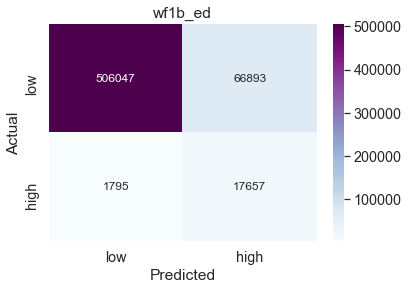

In [20]:
# CONFUSION MATRIX PLOT
df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
# df_cm = df_cm[['low','med','high']]
# df_cm = df_cm.reindex(['low','med','high'])
df_cm = df_cm[['low','high']]
df_cm = df_cm.reindex(['low','high'])
plt.figure(figsize = (6,4))
ax = plt.axes()
sns.set(font_scale=1.3)#for label size
sns.heatmap(df_cm, cmap="BuPu", annot=True, annot_kws={"size": 12},fmt='g')
ax.set_title(dataset.name)
plt.savefig(os.path.join(plots_path, plot_name + dataset.name + '.png'), dpi = 300)

print(cr)
print('Accuracy = ','{:0.5f}'.format(acs))
print('Recall   = ','{:0.5f}'.format(recall))
print('F1 Score = ','{:0.5f}'.format(f1),'\n')

df_cm